# Intro

* From a given data-set, extract a predictor from data
* Dataset used: Boston Housing markets available at UCI machine learning repository
* Reference: Data Driven Science and Engineering Book , by Kutz and Brunton

# Context

Given a system behavior in the form of 

$ Ax = b$,

the goal is derive from observations the coefficients of $x$ that will dictate te weights of each input with respect to the output.

The modeling assumption here is that a given number of measured atributes, such as crime rate, property tax-rate, etc., influence in house pricing per region.

## Opening the data set

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('housing.data', delim_whitespace=True, header=None)

df.head()

C:\Users\felip\AppData\Local\Temp\ipykernel_24612\3124460655.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('housing.data', delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
prices = np.array(df[13])
attributes = df.iloc[:, 0:13].values

print(prices.shape)
print(attributes.shape)

(506,)
(506, 13)


In [40]:
#changing nomenclature for clarification (Ax = b)

b = prices
A = attributes

#Paddings accounts for interception (possibility of a nonzero constant)
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)
print(A)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]]


In [ ]:
#Perform SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)

#Perfom regression of pseudo inverse of A using SVD components
p_inv_A = VT.T @ np.linalg.inv(np.diag(S)) @ U.T 

#Regression Ax = b -> x = inv(A) * B, where inv(A) is based on SVD above
x = p_inv_A @ b

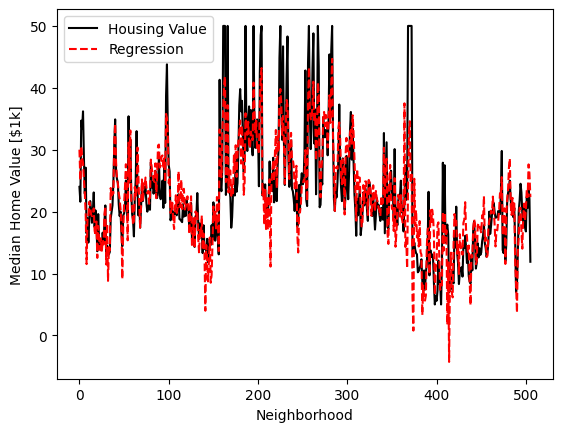

In [ ]:
plt.plot(b, color='k', label='Housing Value') # True relationship
plt.plot(A@x, '--', color='r', label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

In [52]:
#Compute Root mean square error

rmse = np.sqrt(np.mean((b-A@x)**2))
print("RMSE: " + str(rmse) + " [$1k]")

RMSE: 4.679191295697281 [$1k]


# Assess the Accuracy

## $R^2$ Statistics

The $R^2$ statistic is a measure of the linear relatinship between the input and the output, when we compare the estimation performed by linear regression with respect to the original data. In this case, is when we compare our estimation $A \hat x$ with the original $b$ from the model $Ax = b$.

For multi linear regression, the $R^2$ equals $ \text Cor(Y,\hat Y)^2$, that is, the square of the correlation between the predictor's output $A \hat x$ and the original output $b$.

An $R^2$ close to 1 indicate that the model explains a large proportion of the variance in the response variable.

In [61]:
# Compute R^2 Statistics

#Calculate total sum of squares from original measurement
TSS = np.mean((b-np.mean(b))**2)*len(b)

#Calculate residual sum of squares
RSS = np.mean((b-A@x)**2)*len(b)

R2 = 1 - RSS/TSS

print("R2 Statistics coefficient: " + str(R2))



R2 Statistics coefficient: 0.7406426641094095


# Major conclusions

* The trend fits well the data used to process the linear model
* SVD used as technique to ontain the pseudo-inverse matrix of A of a system model as $Ax = b$
* RMSE shows an error of aprox. $4,679.00,  